# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

In [2]:

#Casts a dataframe with two very long sets of random numbers formatted for use as random lat/long coordinates
cities_df = pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

####
#### API SAVER FOR TESTING
####
#cities_df = cities_df.truncate(after = 59)


cities_df.head()

#city = citipy.nearest_city(22.99,120.21)
#city.country_code

,long,lat
0,-129.746319,12.351992
1,-43.379197,52.973609
2,-103.009442,-25.997843
3,147.709495,32.740653
4,-179.448119,23.677124


## Generate Cities List

In [3]:
cities_name = []
countrycode = []
for i in range(0,len(cities_df['lat'])):
    
    #API saver for testing
    #if i>60:
        #break
    
    
    lat = cities_df.iloc[i]['lat']
    long = cities_df.iloc[i]['long']
    city = citipy.nearest_city(lat,long)
    
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
cities_df['City'] = cities_name
cities_df['Country'] = countrycode
cities_df.head(10)

,long,lat,City,Country
0,-129.746319,12.351992,constitucion,mx
1,-43.379197,52.973609,nanortalik,gl
2,-103.009442,-25.997843,puerto ayora,ec
3,147.709495,32.740653,hasaki,jp
4,-179.448119,23.677124,kapaa,us
5,-172.452305,27.297634,kapaa,us
6,167.008959,-60.832844,bluff,nz
7,-50.879994,-6.740195,sao felix do xingu,br
8,-134.536451,24.360725,lompoc,us
9,45.274953,-4.397997,bur gabo,so


In [4]:
#drop duplicate cities in cities_df
cities_copy = cities_df.copy()
new_cities = cities_copy.drop_duplicates("City", keep = 'first')

#reset cities_df's index and truncate at 499 to provide sample size of 500 random cities.
new_cities = new_cities.reset_index(drop = True)
new_cities = new_cities.truncate( after=499)
new_cities

,long,lat,City,Country
0,-129.746319,12.351992,constitucion,mx
1,-43.379197,52.973609,nanortalik,gl
2,-103.009442,-25.997843,puerto ayora,ec
3,147.709495,32.740653,hasaki,jp
4,-179.448119,23.677124,kapaa,us
...,...,...,...,...
495,32.067861,-6.052241,inyonga,tz
496,47.886356,-53.983828,tsihombe,mg
497,-46.099063,-36.755576,rio grande,br
498,-73.435458,-47.051738,coihaique,cl


In [5]:
api_key = weather_api_key


#Establish columns for data to be used in scatter plots
new_cities["Temp"]=""
new_cities["Humidity"]=""
new_cities["Cloudiness"]=""
new_cities["Wind (mph)"]=""
new_cities

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-129.746319,12.351992,constitucion,mx,,,,
1,-43.379197,52.973609,nanortalik,gl,,,,
2,-103.009442,-25.997843,puerto ayora,ec,,,,
3,147.709495,32.740653,hasaki,jp,,,,
4,-179.448119,23.677124,kapaa,us,,,,
...,...,...,...,...,...,...,...,...
495,32.067861,-6.052241,inyonga,tz,,,,
496,47.886356,-53.983828,tsihombe,mg,,,,
497,-46.099063,-36.755576,rio grande,br,,,,
498,-73.435458,-47.051738,coihaique,cl,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Use iterrows() to loop through the new_cities sample size and perform API calls for each 

In [7]:
#Test API print/block status

target_url=f"http://api.openweathermap.org/data/2.5/weather?q={new_cities.City[4]}&appid={weather_api_key}"
weather_json = requests.get(target_url).json()
print(weather_json)


{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.23, 'feels_like': 301.22, 'temp_min': 300.93, 'temp_max': 304.15, 'pressure': 1017, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1599788407, 'sys': {'type': 1, 'id': 7873, 'country': 'US', 'sunrise': 1599754985, 'sunset': 1599799514}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}


In [8]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

for index, row in new_cities.iterrows():
    
    
    #API saver
    #if index>60:
        #break
    
    target_url=f"http://api.openweathermap.org/data/2.5/weather?q={row[2]}&appid={weather_api_key}"
    weather_json = requests.get(target_url).json()
    print(f"Processing Record {index} | {row[2]}")
    
    try:
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        
        #add in list appends here for Humidity, Cloudiness, and Wind (mph)
      
        
    except:
        temp_list.append("")
        humid_list.append("")
        cloud_list.append("")
        wind_list.append("")
        print("City not found. Skipping...")

Processing Record 0 | constitucion
Processing Record 1 | nanortalik
Processing Record 2 | puerto ayora
Processing Record 3 | hasaki
Processing Record 4 | kapaa
Processing Record 5 | bluff
Processing Record 6 | sao felix do xingu
Processing Record 7 | lompoc
Processing Record 8 | bur gabo
City not found. Skipping...
Processing Record 9 | port alfred
Processing Record 10 | mys shmidta
City not found. Skipping...
Processing Record 11 | hobart
Processing Record 12 | punta arenas
Processing Record 13 | hermanus
Processing Record 14 | broome
Processing Record 15 | tyazhinskiy
Processing Record 16 | bethel
Processing Record 17 | lebu
Processing Record 18 | cabo san lucas
Processing Record 19 | hilo
Processing Record 20 | lukulu
Processing Record 21 | goderich
Processing Record 22 | palmer
Processing Record 23 | airai
Processing Record 24 | kavieng
Processing Record 25 | carnarvon
Processing Record 26 | mangalam
Processing Record 27 | poum
Processing Record 28 | east london
Processing Record 2

Processing Record 232 | norman wells
Processing Record 233 | karratha
Processing Record 234 | san juan de betulia
Processing Record 235 | toguchin
Processing Record 236 | lewisville
Processing Record 237 | cascais
Processing Record 238 | natchez
Processing Record 239 | alofi
Processing Record 240 | avera
Processing Record 241 | xichang
Processing Record 242 | roald
Processing Record 243 | olafsvik
Processing Record 244 | bardiyah
Processing Record 245 | sisimiut
Processing Record 246 | sabzevar
Processing Record 247 | anuradhapura
Processing Record 248 | dingli
Processing Record 249 | lavrentiya
Processing Record 250 | ramhormoz
Processing Record 251 | aleksandrov gay
Processing Record 252 | tawang
Processing Record 253 | saint-francois
Processing Record 254 | tuatapere
Processing Record 255 | marawi
Processing Record 256 | lagoa
Processing Record 257 | sabang
Processing Record 258 | port hedland
Processing Record 259 | iralaya
Processing Record 260 | dinguiraye
Processing Record 261 |

Processing Record 462 | mirnyy
Processing Record 463 | louisbourg
City not found. Skipping...
Processing Record 464 | mardin
Processing Record 465 | celestun
Processing Record 466 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 467 | warqla
City not found. Skipping...
Processing Record 468 | othonoi
City not found. Skipping...
Processing Record 469 | garissa
Processing Record 470 | mahaicony
City not found. Skipping...
Processing Record 471 | tura
Processing Record 472 | waiuku
Processing Record 473 | saldanha
Processing Record 474 | dalbeattie
Processing Record 475 | ourossogui
Processing Record 476 | general roca
Processing Record 477 | iqaluit
Processing Record 478 | kadykchan
City not found. Skipping...
Processing Record 479 | ambajogai
Processing Record 480 | pochutla
Processing Record 481 | hambantota
Processing Record 482 | veraval
Processing Record 483 | azimur
City not found. Skipping...
Processing Record 484 | fez
Processing Record 485 | svetlyy
Processin

In [9]:
print(len(temp_list))
print(len(new_cities["Temp"]))

500
500


In [10]:
new_cities["Temp"] = temp_list
new_cities["Humidity"] = humid_list
new_cities["Cloudiness"] = cloud_list
new_cities["Wind (mph)"] = wind_list


#print(len(temp_list))
 

def kelv_to_fahr(temp_kelv):
    """Convert Kelvin to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    
    temp_fahr = (temp_kelv)* 9/5 - 459.67
    return temp_fahr


#converts the strings to numbers so they can be formatted into fahrenheit
#new_cities.dropna() to get rid of the empty variables where data was lacking
#or do a reverse loc statement, removing all that has this characteristic - "NaN" or "" 
#before numericization

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)
new_cities = new_cities.drop(new_cities[new_cities.Temp == ""].index)

new_cities = new_cities.reset_index(drop = True)
new_cities["Temp"] = pd.to_numeric(new_cities["Temp"])
new_cities["Temp"] = kelv_to_fahr(new_cities["Temp"])



new_cities

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-129.746319,12.351992,constitucion,mx,49.982,83,0,5.88
1,-43.379197,52.973609,nanortalik,gl,38.426,72,0,10.05
2,-103.009442,-25.997843,puerto ayora,ec,66.992,91,59,3.13
3,147.709495,32.740653,hasaki,jp,88.466,74,75,3.1
4,-179.448119,23.677124,kapaa,us,84.344,58,20,6.7
...,...,...,...,...,...,...,...,...
447,65.077793,52.262513,kushmurun,kz,53.168,44,92,3.91
448,32.067861,-6.052241,inyonga,tz,62.654,57,18,2.31
449,-46.099063,-36.755576,rio grande,br,55.994,94,0,0.45
450,-73.435458,-47.051738,coihaique,cl,35.600,85,75,0.5


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#export dataframe as csv
#new_cities is a whole set of data, cleaned up, populated, and sorted together. Any missing cities have been pruned out.
#This is the time to save the dataset to a csv for file output. Everything after here will use copies of new_cities or 
#changes to it.

#export save as csv etc
new_cities.to_csv('WeatherPy-SampleCities.csv')
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-129.746319,12.351992,constitucion,mx,49.982,83,0,5.88
1,-43.379197,52.973609,nanortalik,gl,38.426,72,0,10.05
2,-103.009442,-25.997843,puerto ayora,ec,66.992,91,59,3.13
3,147.709495,32.740653,hasaki,jp,88.466,74,75,3.1
4,-179.448119,23.677124,kapaa,us,84.344,58,20,6.7


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

new_cities = new_cities.drop(new_cities[new_cities.Humidity > 100].index)
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-129.746319,12.351992,constitucion,mx,49.982,83,0,5.88
1,-43.379197,52.973609,nanortalik,gl,38.426,72,0,10.05
2,-103.009442,-25.997843,puerto ayora,ec,66.992,91,59,3.13
3,147.709495,32.740653,hasaki,jp,88.466,74,75,3.1
4,-179.448119,23.677124,kapaa,us,84.344,58,20,6.7


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

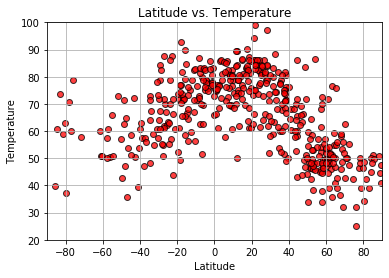

<Figure size 432x288 with 0 Axes>

In [13]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature")
plt.xlim(-90,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

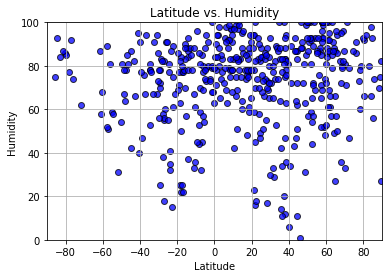

<Figure size 432x288 with 0 Axes>

In [14]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Humidity"]

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsHum.png")

## Latitude vs. Cloudiness Plot

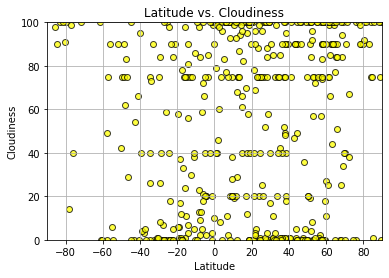

<Figure size 432x288 with 0 Axes>

In [15]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Cloudiness"]

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsCloud.png")

## Latitude vs. Wind Speed Plot

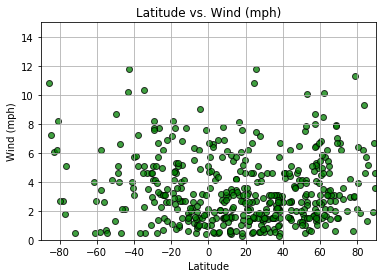

<Figure size 432x288 with 0 Axes>

In [16]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Wind (mph)"]

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph)")
plt.xlim(-90,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsWind.png")

## Linear Regression

In [17]:
#Exactly as above, but need to create two new DFs - north and south - and then just run all the same graphs out of them. Easy.

In [18]:
# split the dataframe into two dataframes, North and South
# Your second requirement is to run linear regression on 
# each relationship, only this time separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees 
# latitude) and Southern Hemisphere (less than 0 degrees latitude):

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

south_df = new_cities.copy()
south_df = south_df.drop(south_df[south_df.lat >= 0].index)
south_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
2,-103.009442,-25.997843,puerto ayora,ec,66.992,91,59,3.13
5,167.008959,-60.832844,bluff,nz,51.008,58,0,0.45
6,-50.879994,-6.740195,sao felix do xingu,br,79.736,45,59,0.47
8,46.018042,-80.602213,port alfred,za,63.140,86,91,8.2
9,154.185429,-57.471679,hobart,au,60.638,51,75,6.2
...,...,...,...,...,...,...,...,...
436,87.026827,-1.334091,hambantota,lk,77.000,100,20,3.1
440,-75.460049,-34.912283,talcahuano,cl,48.200,81,0,4.6
448,32.067861,-6.052241,inyonga,tz,62.654,57,18,2.31
449,-46.099063,-36.755576,rio grande,br,55.994,94,0,0.45


In [19]:
north_df = new_cities.copy()
north_df = north_df.drop(north_df[north_df.lat <= 0].index)
north_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-129.746319,12.351992,constitucion,mx,49.982,83,0,5.88
1,-43.379197,52.973609,nanortalik,gl,38.426,72,0,10.05
3,147.709495,32.740653,hasaki,jp,88.466,74,75,3.1
4,-179.448119,23.677124,kapaa,us,84.344,58,20,6.7
7,-134.536451,24.360725,lompoc,us,61.592,82,1,1.5
...,...,...,...,...,...,...,...,...
444,119.696667,31.526307,liyang,cn,76.460,80,85,0.79
445,25.260060,2.540659,buta,cd,68.468,98,98,0.55
446,103.497287,29.500914,leshan,cn,73.652,72,100,0.74
447,65.077793,52.262513,kushmurun,kz,53.168,44,92,3.91


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

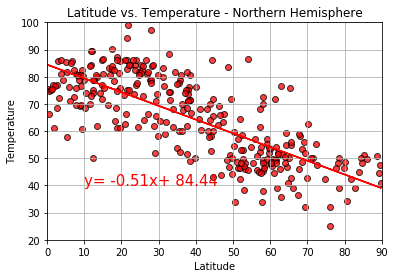

<Figure size 432x288 with 0 Axes>

In [20]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempNorth.png")

In [21]:
#ANALYSIS: As latitude goes up, temperature goes down. IE: It gets colder further from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

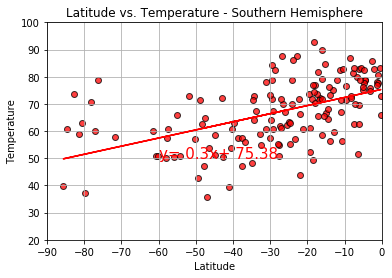

<Figure size 432x288 with 0 Axes>

In [22]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempSouth.png")

In [23]:
#ANALYSIS: The lower the latitude past the equator, the colder the temperature gets again. This proves that it is
#hotter at the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

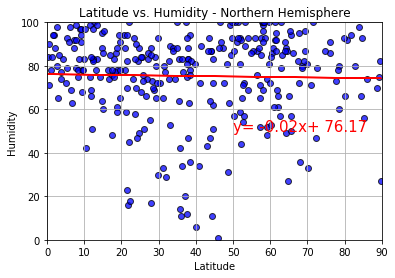

<Figure size 432x288 with 0 Axes>

In [24]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Humidity"]

data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

##add regression
#np.cov(label0.astype(float), rowvar=False)

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsHumNorth.png")

In [25]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

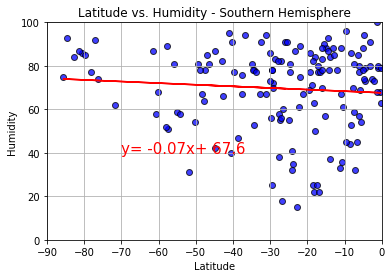

<Figure size 432x288 with 0 Axes>

In [26]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Humidity"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

plt.savefig("LatvsHumSouth.png")

In [27]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

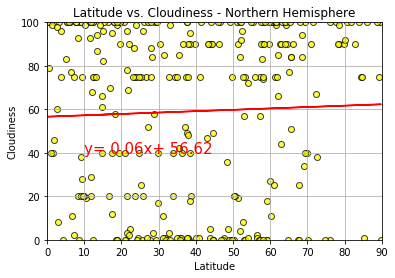

<Figure size 432x288 with 0 Axes>

In [28]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()
#save as png

plt.savefig("LatvsCloudNorth.png")

In [29]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

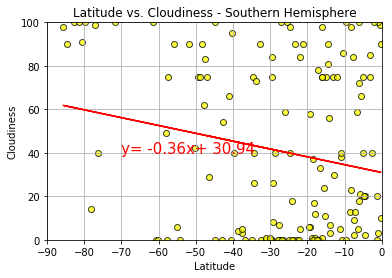

<Figure size 432x288 with 0 Axes>

In [30]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsCloudSouth.png")

In [31]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

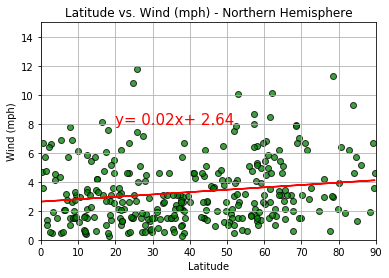

<Figure size 432x288 with 0 Axes>

In [32]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindNorth.png")

In [33]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

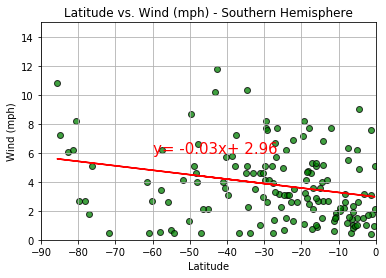

<Figure size 432x288 with 0 Axes>

In [34]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,6),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindSouth.png")

In [35]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.